   ## Deliverable Implementation: Optimization of Employee Retention at **HumanForYou**
### An Ethical Approach Based on AI

### Group : `Manav Thontia`     |   `Delfina Ferreri`    |  `Mathis Veschambre`  |   `Shiva TARDIVEL` 

## Exploration and Data Processing

#### **Suppressing warnings**

In [ ]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

Ce code désactive les avertissements générés par Python (par exemple, les avertissements de dépréciation ou de performance). Cela permet d'éviter que des messages inutiles encombrent la sortie et la rendent plus difficile à lire.

#### **Loading CSV Files**

In [ ]:
import numpy as np 
import os 
from numpy.random import default_rng
import matplotlib 
import matplotlib.pyplot as plt 
import pandas as pd 



intime = pd.read_csv("in_time.csv")
outtime = pd.read_csv("out_time.csv")
general = pd.read_csv("general_data.csv")
manager = pd.read_csv("manager_survey_data.csv")
employee = pd.read_csv("employee_survey_data.csv")


Les fichiers CSV contenant les données nécessaires au projet. Chaque fichier est chargé dans une variable distincte :

- `in_time` : Contient les horaires d'arrivée des employés.
- `out_time` : Contient les horaires de départ.
- `manager_survey_data` : Évaluations des employés faites par les managers.
- `employee_survey_data` : Données issues de l'enquête sur la qualité de vie au travail.
- `general_data` : Informations générales sur les employés.

### Data Files Info

In [ ]:
general.describe()


,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [ ]:
manager.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB


In [ ]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


In [ ]:
intime.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, Unnamed: 0 to 2015-12-31
dtypes: float64(12), int64(1), object(249)
memory usage: 8.8+ MB


In [ ]:
outtime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, Unnamed: 0 to 2015-12-31
dtypes: float64(12), int64(1), object(249)
memory usage: 8.8+ MB


## Handling Missing Data

`general data`

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
import pandas as pd



# Check missing values
print("Missing values in General Data:\n", general.isnull().sum())

# Select only numerical columns for scaling
numeric_cols = general.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(general[numeric_cols])

# KNN Imputation
imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(scaled_data)

# Replace missing values in the original dataframe
general[numeric_cols] = scaler.inverse_transform(imputed_data)

# Verify missing values are handled
print("After KNN Imputation:\n", general.isnull().sum())


Missing values in General Data:
 Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64
After KNN Imputation:
 Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
Employee

The columns `NumCompaniesWorked` and `TotalWorkingYears` have missing values, which may require specific handling.

`manager data`

In [ ]:
# Load the Manager Survey Data


# Check missing values
print("Missing values in Manager Survey:\n", manager.isnull().sum())

# KNN Imputation for numerical columns
numeric_cols_mgr = manager.select_dtypes(include=['float64', 'int64']).columns
scaled_data_mgr = scaler.fit_transform(manager[numeric_cols_mgr])

imputed_data_mgr = imputer.fit_transform(scaled_data_mgr)

# Replace missing values
manager[numeric_cols_mgr] = scaler.inverse_transform(imputed_data_mgr)

# Verify missing values are handled
print("After KNN Imputation:\n", manager.isnull().sum())


Missing values in Manager Survey:
 EmployeeID           0
JobInvolvement       0
PerformanceRating    0
dtype: int64
After KNN Imputation:
 EmployeeID           0
JobInvolvement       0
PerformanceRating    0
dtype: int64


No missing values are detected here.

`employee data`

In [ ]:
# Load the Employee Survey Data


# Check missing values
print("Missing values in Employee Survey:\n", employee.isnull().sum())

# KNN Imputation for numerical columns
numeric_cols_emp = employee.select_dtypes(include=['float64', 'int64']).columns
scaled_data_emp = scaler.fit_transform(employee[numeric_cols_emp])

imputed_data_emp = imputer.fit_transform(scaled_data_emp)

# Replace missing values
employee[numeric_cols_emp] = scaler.inverse_transform(imputed_data_emp)

# Verify missing values are handled
print("After KNN Imputation:\n", employee.isnull().sum())


Missing values in Employee Survey:
 EmployeeID                  0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64
After KNN Imputation:
 EmployeeID                 0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
dtype: int64


The columns `EnvironmentSatisfaction`, `JobSatisfaction`, and `WorkLifeBalance` have missing values. This may indicate that some employees did not respond to these questions.

### Merging Dataset File (manager , employee , general)

In [ ]:
# Merge the general_data, employee_survey_data, and manager_survey_data on EmployeeID
full_data = pd.merge(general, employee, on="EmployeeID", how="left")
full_data = pd.merge(full_data, manager, on="EmployeeID", how="left")



# Now, final_data contains all the engineered features
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   float64
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   float64
 5   Education                4410 non-null   float64
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   float64
 8   EmployeeID               4410 non-null   float64
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   float64
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   float64
 14  NumCompaniesWorked      

Three datasets are merged on the EmployeeID column using a left join, ensuring all rows from the general dataset are retained. The resulting dataset contains 4,410 rows and 29 columns. An inspection of its structure confirms that all columns have appropriate data types and no missing values.

#### Numeric Encoding 

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
encoder = LabelEncoder()

# List of categorical columns for which you want to apply LabelEncoder
categorical_columns = ['Attrition','BusinessTravel', 'Department', 'EducationField','Gender', 'JobRole', 'MaritalStatus',"Over18"]

# Apply label encoding
for col in categorical_columns:
    full_data[col] = encoder.fit_transform(full_data[col])

# Check the result
full_data


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51.0,0,2,2,6.0,2.0,1,1.0,1.0,0,...,1.0,6.0,1.0,0.0,0.0,3.0,4.0,2.0,3.0,3.0
1,31.0,1,1,1,10.0,1.0,1,1.0,2.0,0,...,6.0,3.0,5.0,1.0,4.0,3.0,2.0,4.0,2.0,4.0
2,32.0,0,1,1,17.0,4.0,4,1.0,3.0,1,...,5.0,2.0,5.0,0.0,3.0,2.0,2.0,1.0,3.0,3.0
3,38.0,0,0,1,2.0,5.0,1,1.0,4.0,1,...,13.0,5.0,8.0,7.0,5.0,4.0,4.0,3.0,2.0,3.0
4,32.0,0,2,1,10.0,1.0,3,1.0,5.0,1,...,9.0,2.0,6.0,0.0,4.0,4.0,1.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42.0,0,2,1,5.0,4.0,3,1.0,4406.0,0,...,10.0,5.0,3.0,0.0,2.0,4.0,1.0,3.0,3.0,3.0
4406,29.0,0,2,1,2.0,4.0,3,1.0,4407.0,1,...,10.0,2.0,3.0,0.0,2.0,4.0,4.0,3.0,2.0,3.0
4407,25.0,0,2,1,25.0,2.0,1,1.0,4408.0,1,...,5.0,4.0,4.0,1.0,2.0,1.0,3.0,3.0,3.0,4.0
4408,42.0,0,2,2,18.0,2.0,3,1.0,4409.0,1,...,10.0,2.0,9.0,7.0,8.0,4.0,1.0,3.0,2.0,3.0


Label encoding has been applied to transform categorical columns into numerical format. Using LabelEncoder, categories such as Attrition, BusinessTravel, Department, and others have been encoded with integer values. This ensures the data is ready for machine learning models that require numerical input. The dataset now contains 4,410 rows and 29 columns, with the categorical data successfully converted.

## Data Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# List of numerical columns to standardize
numerical_features = [
    'JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction',
    'JobSatisfaction', 'Age', 'DistanceFromHome', 'Education',
    'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears',
    'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
    'YearsWithCurrManager', 'WorkLifeBalance','JobLevel'
]

# Standardize the numerical features
scaler = StandardScaler()
full_data[numerical_features] = scaler.fit_transform(full_data[numerical_features])


- **StandardScaler** is used to **normalize numerical values**, i.e., bringing all values to the same scale.

- Each value is transformed using the following formula:

  $$
  X_{norm} = \frac{X - \mu}{\sigma}
  $$

- Where:  
  - $X$: Raw value  
  - $\mu$: Mean of the variable  
  - $\sigma$: Standard deviation of the variable

This ensures that all values are centered around **0**, with a **standard deviation of 1**, making it easier to train machine learning models.


## Merging With Time

In [ ]:
import pandas as pd
import numpy as np

# Merge intime and outtime datasets with the main dataset
merged_data = pd.merge(intime, outtime, on="EmployeeID", how="left")

# Function to calculate total hours worked for each day (in hours) and mean time
def calculate_working_hours(row):
    total_hours = 0
    working_hours_for_each_employee = []

    for date in intime.columns[1:]:  # Skipping EmployeeID column
        check_in = pd.to_datetime(row[date + '_x'], errors='coerce')  # Intime
        check_out = pd.to_datetime(row[date + '_y'], errors='coerce')  # Outtime
        if pd.notnull(check_in) and pd.notnull(check_out):
            hours_worked = (check_out - check_in).total_seconds() / 3600  # Convert seconds to hours
            total_hours += hours_worked
            working_hours_for_each_employee.append(hours_worked)

    mean_time = np.mean(working_hours_for_each_employee) if working_hours_for_each_employee else 0
    return total_hours, mean_time

# Add total time worked and mean time worked columns
merged_data[['total_time_worked', 'mean_time_worked']] = merged_data.apply(
    lambda row: pd.Series(calculate_working_hours(row)), axis=1
)

# Calculate total working days for each employee
merged_data['total_working_days'] = merged_data.apply(
    lambda row: sum(
        pd.notnull(row[date + '_x']) and pd.notnull(row[date + '_y']) for date in intime.columns[1:]
    ), axis=1
)

final_data = pd.merge(full_data, merged_data, on="EmployeeID", how="left")

columns_to_drop = [col for col in final_data.columns if '_x' in col or '_y' in col]
final_data = final_data.drop(columns=columns_to_drop)

# Save the cleaned dataset
final_data.to_csv('data_final.csv', index=False)

copy3 = final_data.copy()
copy3.head()


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,total_time_worked,mean_time_worked,total_working_days
0,1.541369,0,2,2,-0.393938,-0.891688,1,1.0,1.0,0,...,-0.679146,-1.155935,0.253025,1.157578,-1.082368,0.379672,-0.426230,1710.800000,7.374138,232.0
1,-0.648668,1,1,1,0.099639,-1.868426,1,1.0,2.0,0,...,-0.368715,-0.034520,0.253025,-0.662293,1.760033,-1.026167,2.346151,1821.383333,7.717726,236.0
2,-0.539166,0,1,1,0.963398,1.061787,4,1.0,3.0,1,...,-0.679146,-0.314873,-0.664456,-0.662293,-2.503569,0.379672,-0.426230,1697.266667,7.013499,242.0
3,0.117845,0,0,1,-0.887515,2.038524,1,1.0,4.0,1,...,1.493867,0.245834,1.170506,1.157578,0.338832,-1.026167,-0.426230,1690.466667,7.193475,235.0
4,-0.539166,0,2,1,0.099639,-1.868426,3,1.0,5.0,1,...,-0.679146,-0.034520,1.170506,-1.572228,0.338832,0.379672,-0.426230,NaN,NaN,NaN


The intime and outtime datasets are merged with the main dataset using EmployeeID to calculate the total hours worked by each employee. A function computes the total time worked across all days by calculating the difference between check-in and check-out times for each day. Additionally, the total number of working days for each employee is determined by counting the days with valid check-in and check-out entries. The resulting dataset, merged with the main data

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
import pandas as pd


print("Missing values in General Data:\n", copy3.isnull().sum())

# Select only numerical columns for scaling
numeric_cols = copy3.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(copy3[numeric_cols])

# KNN Imputation
imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(scaled_data)

# Replace missing values in the original dataframe
copy3[numeric_cols] = scaler.inverse_transform(imputed_data)

# Verify missing values are handled
print("After KNN Imputation:\n", copy3.isnull().sum())
copy3


Missing values in General Data:
 Age                          0
Attrition                    0
BusinessTravel               0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
EmployeeID                   0
Gender                       0
JobLevel                     0
JobRole                      0
MaritalStatus                0
MonthlyIncome                0
NumCompaniesWorked           0
Over18                       0
PercentSalaryHike            0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
TrainingTimesLastYear        0
YearsAtCompany               0
YearsSinceLastPromotion      0
YearsWithCurrManager         0
EnvironmentSatisfaction      0
JobSatisfaction              0
WorkLifeBalance              0
JobInvolvement               0
PerformanceRating            0
total_time_worked          283
mean_time_worked           283
total_

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,total_time_worked,mean_time_worked,total_working_days
0,1.541369,0,2,2,-0.393938,-0.891688,1,1.0,1.0,0,...,-0.679146,-1.155935,0.253025,1.157578,-1.082368,0.379672,-0.426230,1710.800000,7.374138,232.0
1,-0.648668,1,1,1,0.099639,-1.868426,1,1.0,2.0,0,...,-0.368715,-0.034520,0.253025,-0.662293,1.760033,-1.026167,2.346151,1821.383333,7.717726,236.0
2,-0.539166,0,1,1,0.963398,1.061787,4,1.0,3.0,1,...,-0.679146,-0.314873,-0.664456,-0.662293,-2.503569,0.379672,-0.426230,1697.266667,7.013499,242.0
3,0.117845,0,0,1,-0.887515,2.038524,1,1.0,4.0,1,...,1.493867,0.245834,1.170506,1.157578,0.338832,-1.026167,-0.426230,1690.466667,7.193475,235.0
4,-0.539166,0,2,1,0.099639,-1.868426,3,1.0,5.0,1,...,-0.679146,-0.034520,1.170506,-1.572228,0.338832,0.379672,-0.426230,1836.283333,7.716701,238.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,0.555852,0,2,1,-0.517332,1.061787,3,1.0,4406.0,0,...,-0.679146,-0.595227,1.170506,-1.572228,0.338832,0.379672,-0.426230,2070.900000,8.522222,243.0
4406,-0.867672,0,2,1,-0.887515,1.061787,3,1.0,4407.0,1,...,-0.679146,-0.595227,1.170506,1.157578,0.338832,-1.026167,-0.426230,1468.433333,6.093084,241.0
4407,-1.305679,0,2,1,1.950552,-0.891688,1,1.0,4408.0,1,...,-0.368715,-0.595227,-1.581937,0.247643,0.338832,0.379672,2.346151,1780.300000,7.706926,231.0
4408,0.555852,0,2,2,1.086793,-0.891688,3,1.0,4409.0,1,...,1.493867,1.086895,1.170506,-1.572228,0.338832,-1.026167,-0.426230,2287.650000,9.492324,241.0


This code addresses missing values in the copy3 dataset by first scaling the numerical columns using Min-Max scaling, then applying K-Nearest Neighbors (KNN) imputation to fill in the missing values based on the 5 nearest neighbors. After imputation, the data is reverted back to its original scale, and a final check ensures there are no remaining missing values.

### boxplots

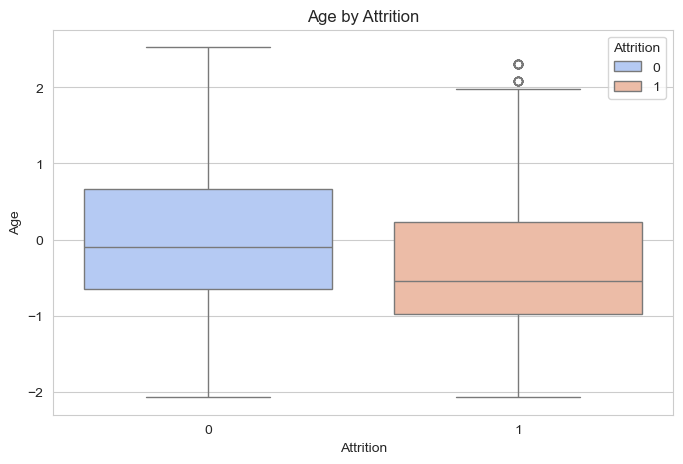

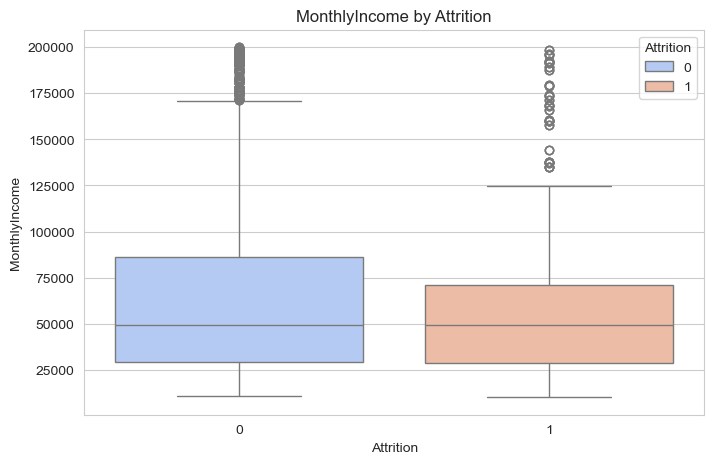

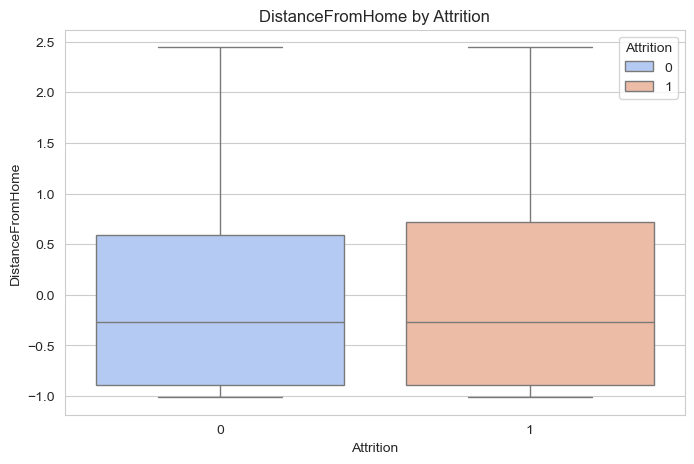

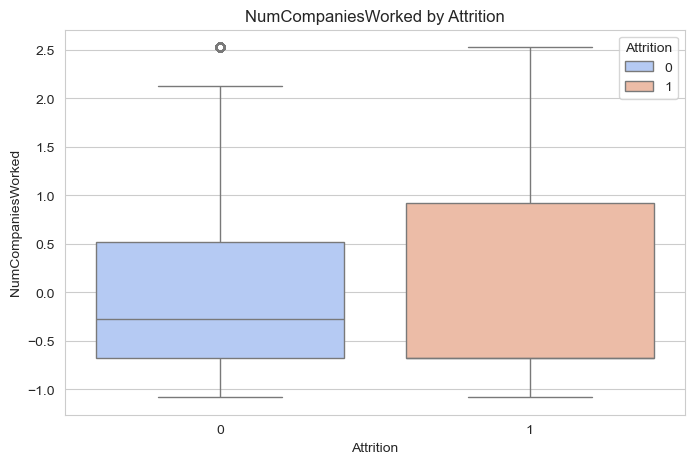

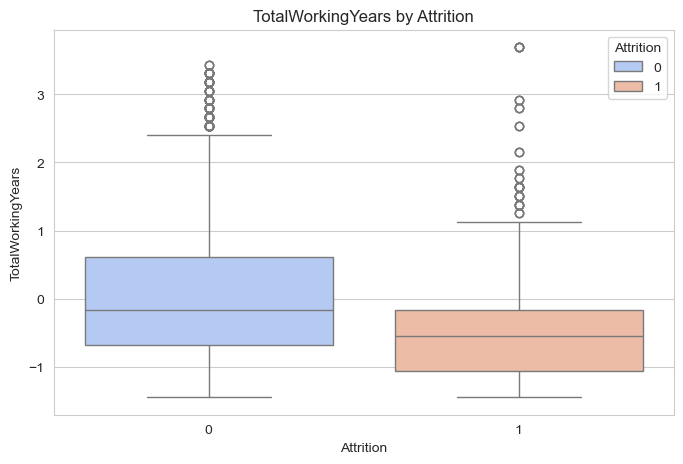

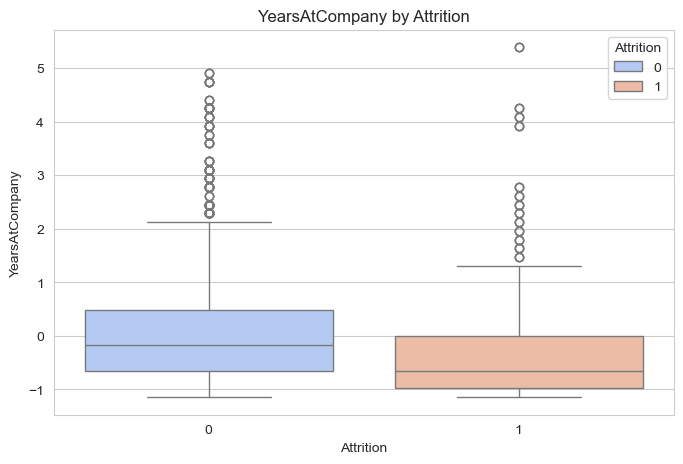

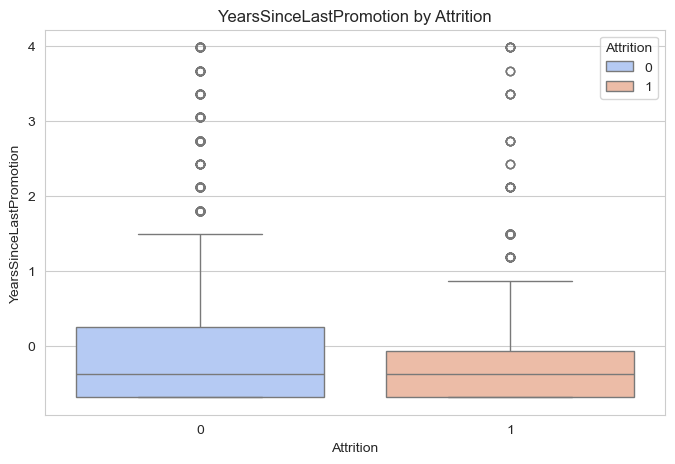

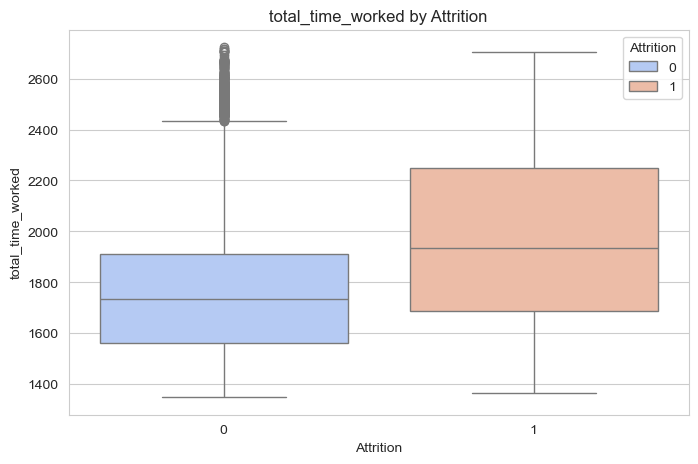

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the plots
sns.set_style("whitegrid")
palette = sns.color_palette("coolwarm", n_colors=2)  # 2 colors for the Attrition categories

# List of numerical columns
numerical_columns = ['Age', 'MonthlyIncome', 'DistanceFromHome', 
                      'NumCompaniesWorked', 'TotalWorkingYears', 
                      'YearsAtCompany', 'YearsSinceLastPromotion'
                      ,'total_time_worked'  ]



# Boxplots for numerical attributes vs. Attrition
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Attrition', y=column, data=copy3, hue='Attrition', palette=palette)  # Added hue
    plt.title(f"{column} by Attrition")
    plt.xlabel("Attrition")
    plt.ylabel(column)
    plt.show()



For each numerical column (Age, MonthlyIncome, DistanceFromHome, NumCompaniesWorked, TotalWorkingYears, YearsAtCompany, YearsSinceLastPromotion, total_time_worked, total_working_days), a boxplot is created to compare the distribution of values for employees with and without attrition. The boxplot provides insights into the central tendency, spread, and presence of outliers in each attribute, grouped by the Attrition categories. This helps understand how different numerical features vary between employees who left the company and those who stayed.

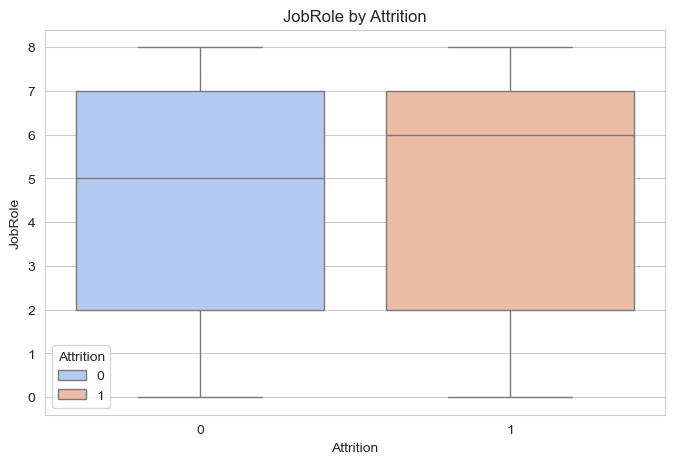

In [ ]:
# List of categorical columns
categorical_columns = [ 'JobRole']

# Boxplots for categorical attributes vs. Attrition
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Attrition', y=column, data=copy3, hue='Attrition', palette=palette)  # Added hue
    plt.title(f"{column} by Attrition")
    plt.xlabel("Attrition")
    plt.ylabel(column)
    plt.show()
